# Netflix Movies & TV Shows dataset

### Load & Explore the Dataset

In [3]:
import pandas as pd
import numpy as np


df=pd.read_csv('C:/Users/USER/Documents/Github/Machine Learning/datasets/netflix_titles.csv')
print(df.shape)
print(df.info())
df.describe()
df.head()

(8807, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Null Handling

In [4]:
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


#### Null value summary
| Column       | Missing | % Missing | Strategy                                                                       |
| ------------ | ------- | --------- | ------------------------------------------------------------------------------ |
| `director`   | 2634    | \~30%+    | Impute with `"Unknown"` or `"Not Specified"`                                   |
| `cast`       | 825     | \~10%     | Impute with `"Unknown"` or `"Not Available"`                                   |
| `country`    | 831     | \~10%     | Impute with mode or `"Unknown"`                                                |
| `date_added` | 10      | <1%       | Drop rows or impute with mode                                                  |
| `rating`     | 4       | very low  | Impute with mode                                                               |
| `duration`   | 3       | very low  | Impute with mode (for TV Shows it's like "1 Season", for Movies like "90 min") |


In [5]:
df['director'].fillna("Unknown",inplace=True)
df['cast'].fillna("Unknown",inplace=True)
df['country'].fillna(df['country'].mode()[0],inplace=True)
df.dropna(subset=['date_added'],inplace=True)
df['rating'].fillna(df['rating'].mode()[0],inplace=True)

df.loc[(df['duration'].isnull()) & (df['type']=='Movie'),'duration']='90 min'
df.loc[(df['duration'].isnull()) & (df['type']=='TV Show'),'duration']='1 Season'

df.isnull().sum()

C:\Users\USER\AppData\Local\Temp\ipykernel_1556\4225092327.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna("Unknown",inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_1556\4225092327.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### Check For Duplicates

In [6]:
print("Duplicate show_ids:", df['show_id'].duplicated().sum())
print("Fully duplicated rows:", df.duplicated().sum())

# df.drop_duplicates(inplace=True)  #for handling duplicates

Duplicate show_ids: 0
Fully duplicated rows: 0


### Encoding

#### Goal: Encode Categorical Columns like

type → (Movie / TV Show)

rating → (TV-MA, PG, R, etc.)

country → (India, United States, etc.)

listed_in → multiple genres/categories

director, cast → usually left as-is or handled in feature engineering due to high cardinality

In [7]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
# Label Encoding for binary columns
df['type_encoded']=df['type'].map({'Movies':0,'TV shows':1})

In [9]:
# One hot encoding for low-cardinality columns

#if ~10-20 unique values
rating_dummies=pd.get_dummies(df['rating'],prefix='rating')
df=pd.concat([df,rating_dummies],axis=1)


#Top N countries only, rest grouped as "Other"
top_countries=df['country'].value_counts().nlargest(5).index
df['country_simplified']=df['country'].apply(lambda x:x if x in top_countries else "Other")

country_dummies=pd.get_dummies(df['country_simplified'],prefix='country')
df=pd.concat([df,country_dummies],axis=1)



In [10]:
# Multi-Label Handling
from sklearn.preprocessing import MultiLabelBinarizer

df['listed_in_split']=df['listed_in'].apply(lambda x : [i.strip() for i in x.split(',')])
mlb=MultiLabelBinarizer()
listed_in_dummies=pd.DataFrame(mlb.fit_transform(df['listed_in_split']),columns=mlb.classes_)

df=pd.concat([df,listed_in_dummies],axis=1)


### Feature Engineering

🔹 From date_added:
year_added → Year Netflix added the title

month_added → Month name (e.g., January)

🔹 From cast:
num_actors → Number of actors listed

🔹 From listed_in:
genre_count → Number of genres assigned

🔹 Binary Flags:
is_movie → 1 if type == 'Movie', else 0

is_international → 1 if country is not 'United States'

In [11]:
df['date_added']=pd.to_datetime(df['date_added'],format='mixed')

df['year_added']=df['date_added'].dt.year
df['month_added']=df['date_added'].dt.month_name()

df['num_actors']=df['cast'].fillna('').apply(lambda x : len(x.split(",")) if x else 0)

df['genre_count']=df['listed_in'].fillna('').apply(lambda x : len(x.split(',')) if x else 0)

df['is_movie']=df['type'].apply(lambda x : 1 if x=='Movie' else 0)

df['is_international']=df['country'].apply(lambda x : 0 if x=='United States' else 1)

df.rename(columns={"Kids' TV": "Kids_TV"}, inplace=True)

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,TV Shows,TV Thrillers,Teen TV Shows,Thrillers,year_added,month_added,num_actors,genre_count,is_movie,is_international
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020.0,PG-13,90 min,...,0.0,0.0,0.0,0.0,2021.0,September,1,1,1,0
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021.0,TV-MA,2 Seasons,...,0.0,0.0,0.0,0.0,2021.0,September,19,3,0,1
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021.0,TV-MA,1 Season,...,0.0,0.0,0.0,0.0,2021.0,September,9,3,0,0
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,United States,2021-09-24,2021.0,TV-MA,1 Season,...,0.0,0.0,0.0,0.0,2021.0,September,1,2,0,0
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021.0,TV-MA,2 Seasons,...,0.0,0.0,0.0,0.0,2021.0,September,8,3,0,1


### Scaling
✅ Candidates for Scaling
| Feature        | Reason to Scale                                          |
| -------------- | -------------------------------------------------------- |
| `release_year` | Numerical, year range                                    |
| `num_actors`   | Count, useful for modeling                               |
| `genre_count`  | Number of genres (1–4 or more)                           |
| `duration`     | Important for movies (needs conversion to minutes first) |


In [12]:
# Handling Only duration of Movies

# Only for movies: extract numeric part of "90 min"
df['duration_mins']=df.apply(lambda x : int(x['duration'].split()[0]) if x['is_movie']==1 else None,axis=1)

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Features to scale
features_to_scale = ['release_year', 'num_actors', 'genre_count', 'duration_mins']

# Fill NaNs in duration_mins with median for now
df['duration_mins'] = df['duration_mins'].fillna(df['duration_mins'].median())

# Apply scaling
df_scaled = df.copy()
df_scaled[features_to_scale] = scaler.fit_transform(df_scaled[features_to_scale])


df_scaled[features_to_scale].describe()



,release_year,num_actors,genre_count,duration_mins
count,8797.000000,8807.000000,8807.000000,8807.000000
mean,0.928994,0.147342,0.730593,0.310986
std,0.091898,0.094655,0.262452,0.076407
min,0.000000,0.000000,0.000000,0.000000
25%,0.916667,0.080000,0.666667,0.288026
50%,0.958333,0.160000,0.666667,0.307443
75%,0.979167,0.200000,1.000000,0.333333
max,1.000000,1.000000,1.000000,1.000000


### EDA Visuals

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')
plt.figure(figsize=(10,6))




<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

C:\Users\USER\AppData\Local\Temp\ipykernel_1556\2660294900.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='type',palette='Set2')


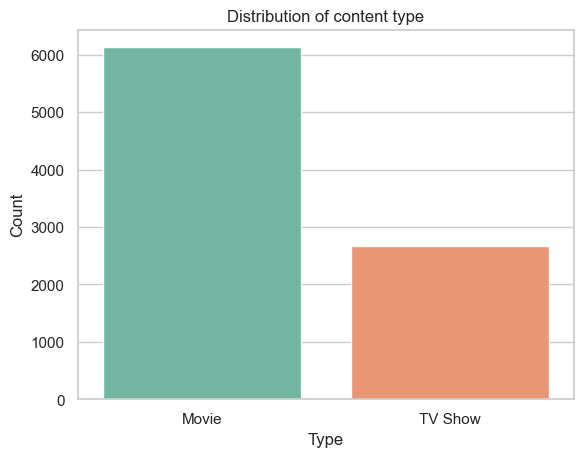

C:\Users\USER\AppData\Local\Temp\ipykernel_1556\2660294900.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='rating',order=df['rating'].value_counts().index,palette='Set3')


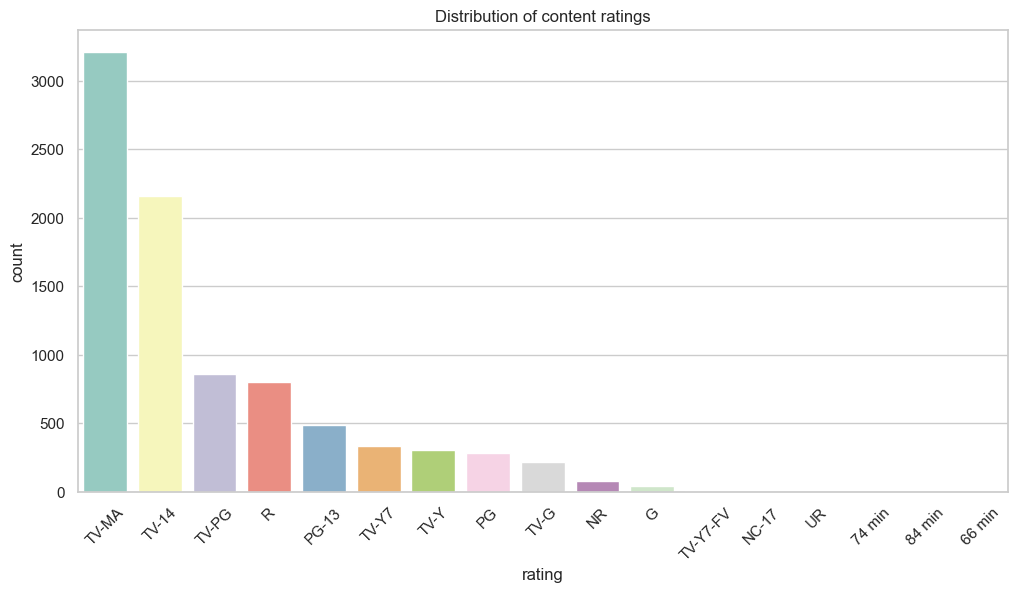

In [15]:
#Univariate Analysis

#Count of Movies vs TV Shows
sns.countplot(data=df,x='type',palette='Set2')
plt.title("Distribution of content type")
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

#Count of Ratings
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='rating',order=df['rating'].value_counts().index,palette='Set3')
plt.title("Distribution of content ratings")
plt.xticks(rotation=45)
plt.show()

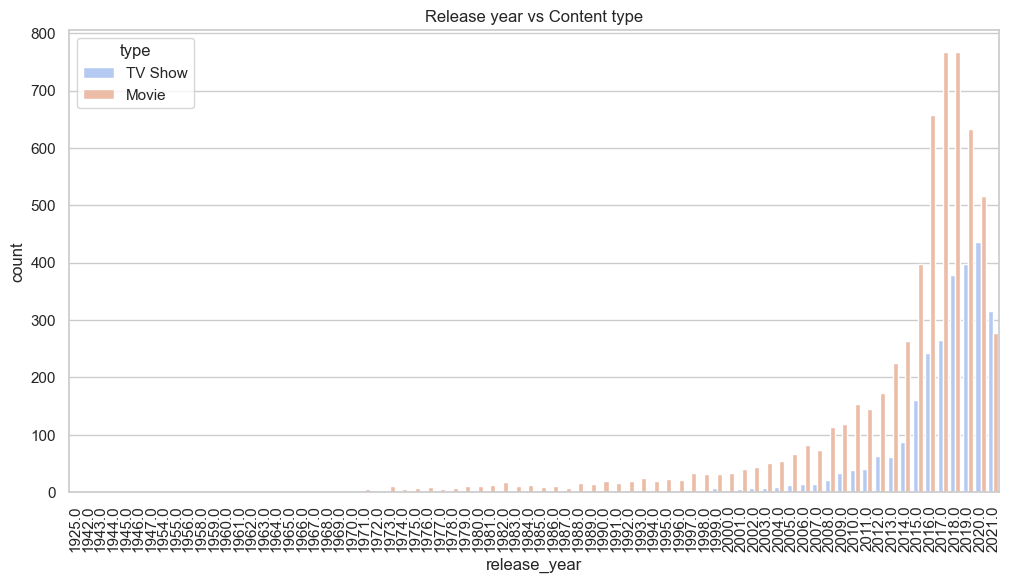

C:\Users\USER\AppData\Local\Temp\ipykernel_1556\3105323349.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['is_movie']==1],x='rating',y='duration_mins',palette='Pastel1')


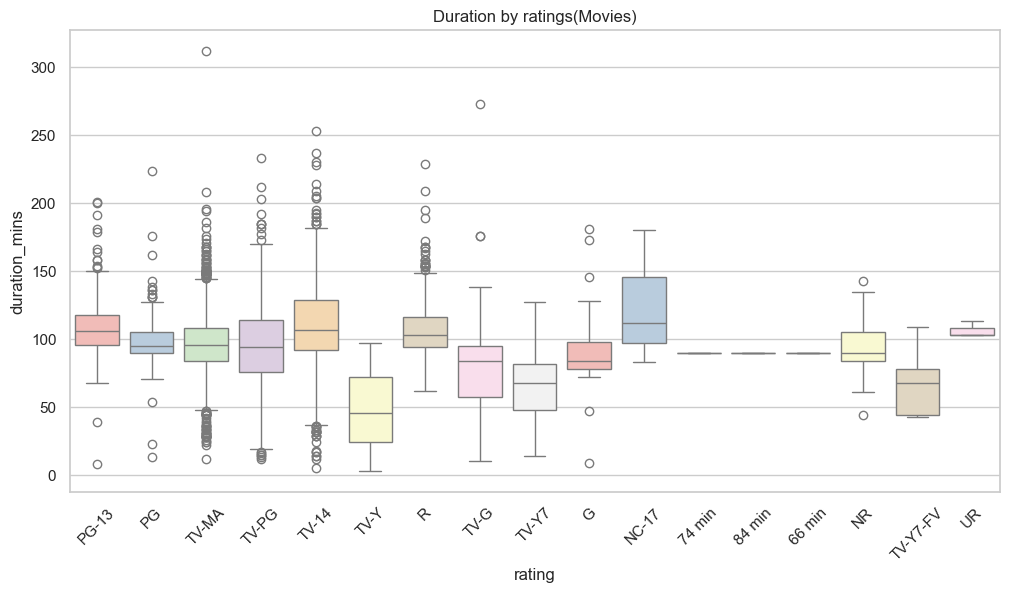

In [16]:
#Bivariate Analysis

#Year-wise Content Addition by Type
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='release_year',hue='type',palette='coolwarm')
plt.title("Release year vs Content type")
plt.xticks(rotation=90)
plt.show()

#Rating vs Duration (Movies Only)
plt.figure(figsize=(12,6))
sns.boxplot(data=df[df['is_movie']==1],x='rating',y='duration_mins',palette='Pastel1')
plt.title('Duration by ratings(Movies)')
plt.xticks(rotation=45)
plt.show()

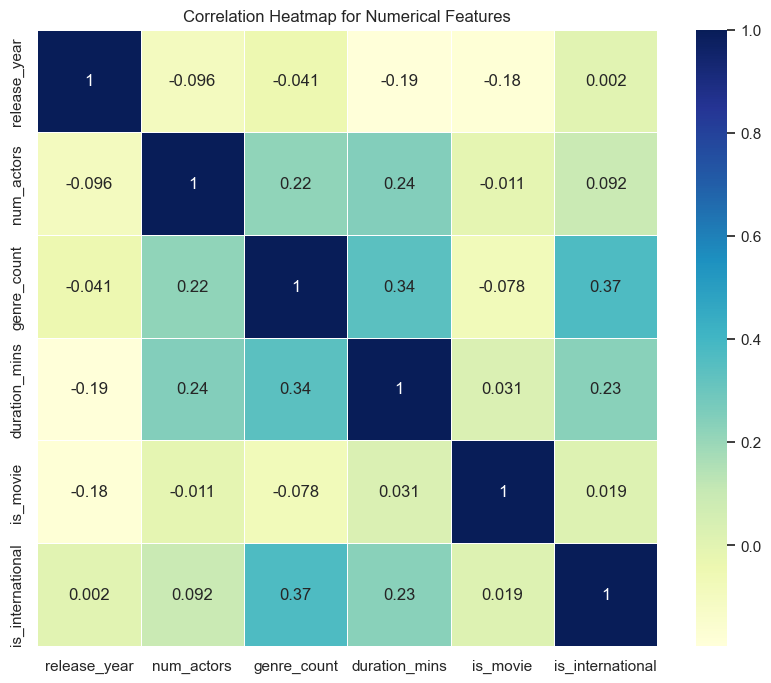

In [17]:
#Multivariate Analysis

#correlation Heatmap
plt.figure(figsize=(10,8))
numerical_features=['release_year','num_actors','genre_count','duration_mins','is_movie','is_international']
sns.heatmap(df[numerical_features].corr(),annot=True,cmap='YlGnBu',linewidths=0.5)
plt.title('Correlation Heatmap for Numerical Features')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_1556\688568785.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='year_added',palette='viridis')


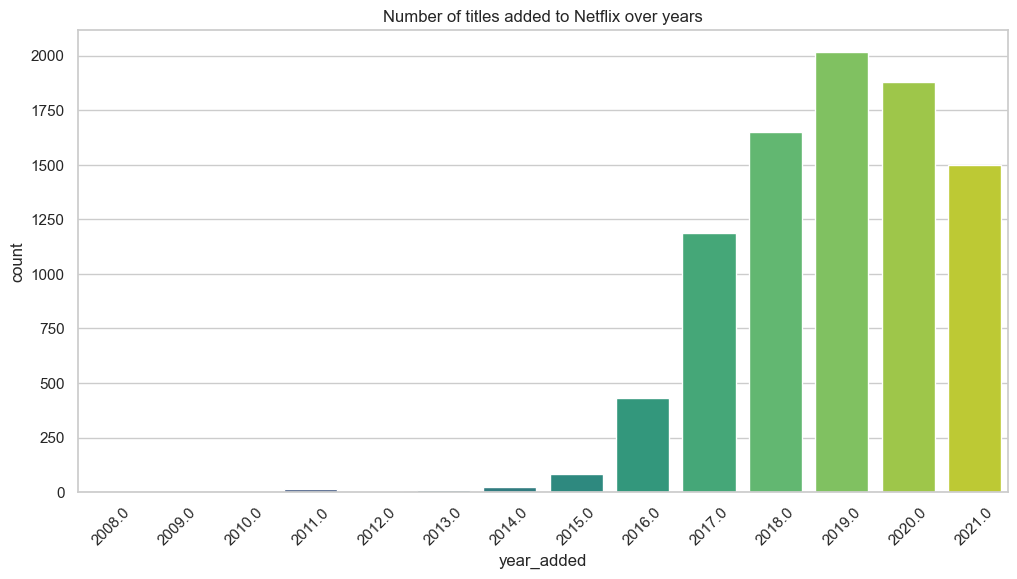

In [18]:
#Trend over time
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='year_added',palette='viridis')
plt.title("Number of titles added to Netflix over years")
plt.xticks(rotation=45)
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_1556\491020592.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index,y=top_countries.values,palette='Spectral')


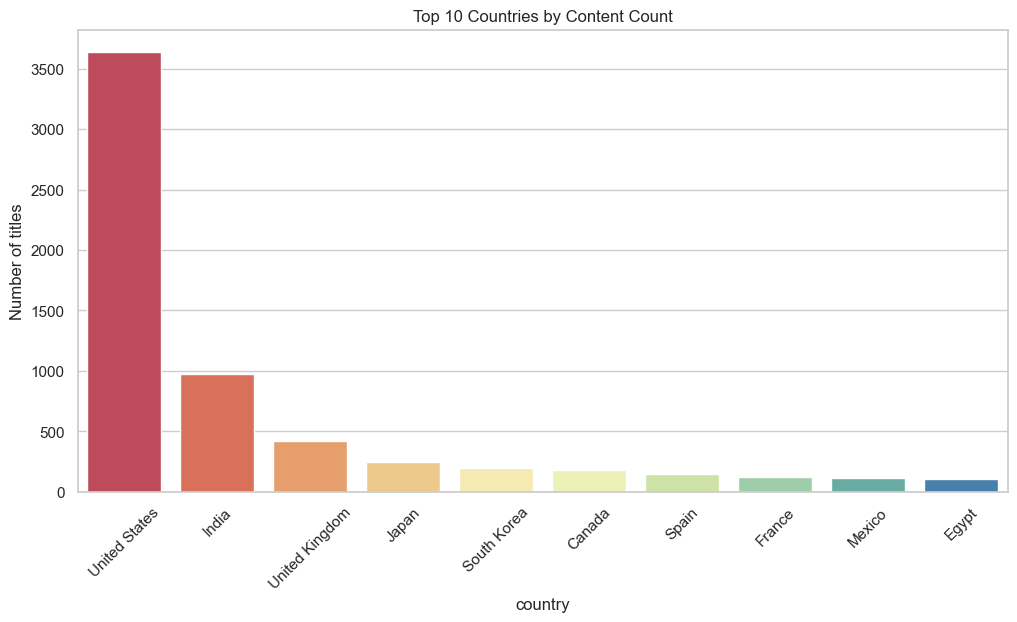

In [19]:
#Top Contributors

#Top 10 Countries by Content Count

plt.figure(figsize=(12,6))
top_countries=df['country'].value_counts().nlargest(10)
sns.barplot(x=top_countries.index,y=top_countries.values,palette='Spectral')
plt.title('Top 10 Countries by Content Count')
plt.xticks(rotation=45)
plt.ylabel('Number of titles')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_1556\2763930285.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.index,y=top_directors.values,palette='cool')


<function matplotlib.pyplot.show(close=None, block=None)>

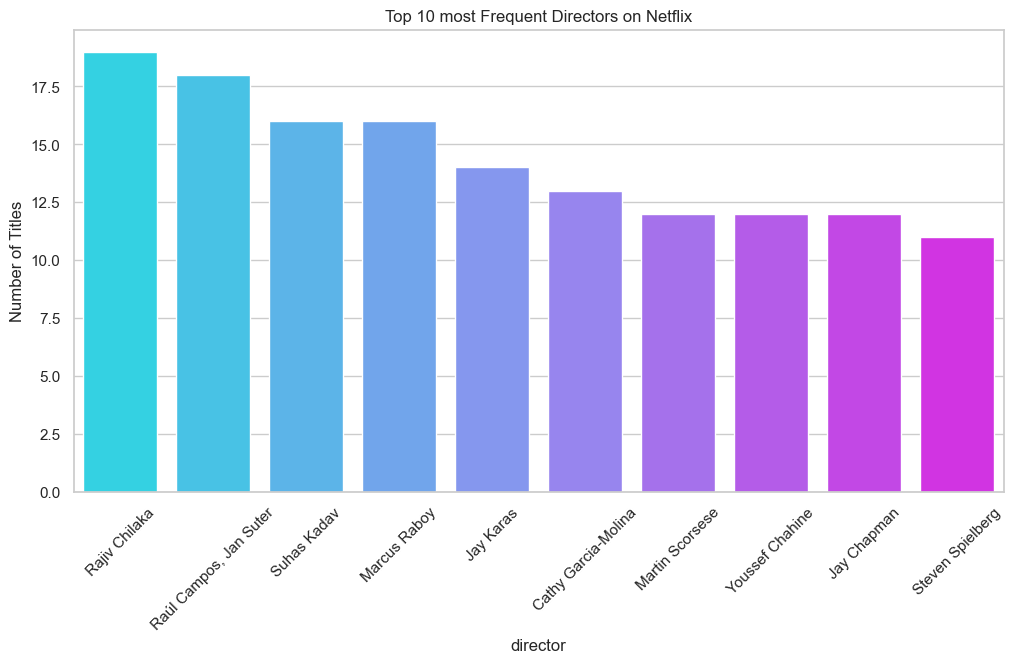

In [20]:
#Most frequent directors

plt.figure(figsize=(12,6))
top_directors=df['director'].value_counts().drop('Unknown').nlargest(10)
sns.barplot(x=top_directors.index,y=top_directors.values,palette='cool')
plt.title("Top 10 most Frequent Directors on Netflix")
plt.xticks(rotation=45)
plt.ylabel('Number of Titles')
plt.show

C:\Users\USER\AppData\Local\Temp\ipykernel_1556\3509338733.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_actors.keys()),y=list(top_actors.values()),palette='magma')


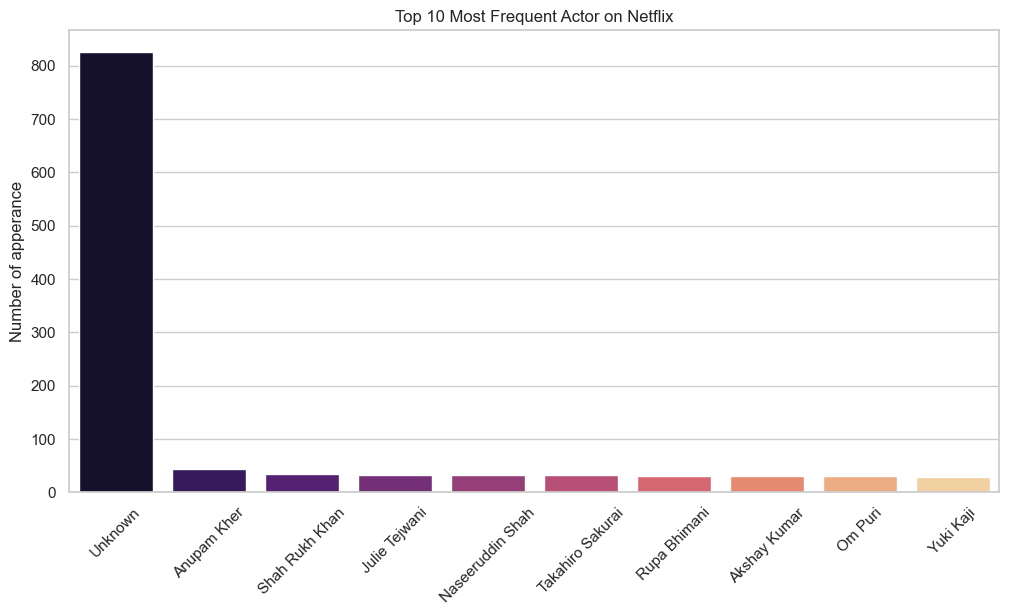

In [21]:
#Most Frequent Actors

from collections import Counter

all_actors=df['cast'].dropna().apply(lambda x : [i.strip() for i in x.split(',')])
actor_counts=Counter([actor for sublist in all_actors for actor in sublist])
top_actors=dict(actor_counts.most_common(10))

plt.figure(figsize=(12,6))
sns.barplot(x=list(top_actors.keys()),y=list(top_actors.values()),palette='magma')
plt.title('Top 10 Most Frequent Actor on Netflix')
plt.xticks(rotation=45)
plt.ylabel('Number of apperance')
plt.show()